In [2]:
#use using dataframe model from Logistic Regression Accuracy: cuisine_test_dataframe
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

trainData_df = pd.read_json('./train.json')
testData_df = pd.read_json('./test.json')

# creating a list for the ingredi|ents in train.json on each cuisine
def  count_list_of_ingred(string):       
    all_ingred = []
    for (idx, row) in trainData_df.iterrows():
        if (row.loc['cuisine'] == string):
            for item in row.ingredients:
                all_ingred.append(item)
    return all_ingred

In [3]:
#getting the set of cuisines
trainData_df['cuisine']

#getting the set of cuisines
cuisine_set = set()
list_of_cuisines = []

for item in trainData_df['cuisine']:
    cuisine_set.add(item)
list_of_cuisines = list(cuisine_set)

In [6]:
#to show a list of the ingredients from the list of test.json
# using dataframe model from Logistic Regression Accuracy
predicted_ingredients = cuisine_test_dataframe['ingredients'][37]

In [14]:
#helpful for creating counter
from collections import Counter

#creating a list of ingredients for each cuisine
greek_ingrediants_list = count_list_of_ingred('italian')
indian_ingredients_list = count_list_of_ingred('indian')
filipino_ingredients_list = count_list_of_ingred('filipino')
irish_ingredients_list = count_list_of_ingred('irish')
vietnamese_ingredients_list = count_list_of_ingred('vietnamese')
jamaican_ingredients_list = count_list_of_ingred('jamaican')
mexican_ingredients_list =count_list_of_ingred('mexican')
russian_ingredients_list = count_list_of_ingred('russian')
spanish_ingredients_list = count_list_of_ingred('spanish')
brazilian_ingredients_list =count_list_of_ingred('brazilian')
british_ingredients_list =count_list_of_ingred('british')
italian_ingredients_list = count_list_of_ingred('italian')
thai_ingredients_list = count_list_of_ingred('thai')
moroccan_ingredients_list = count_list_of_ingred('moroccan')
korean_ingredients_list = count_list_of_ingred('korean')
cajun_ingredients_list = count_list_of_ingred('cajun')
french_ingredients_list = count_list_of_ingred('french')
southern_us_ingredients_list = count_list_of_ingred('southern_us')
greek_ingredients_list = count_list_of_ingred('greek')
japanese_ingredients_list = count_list_of_ingred('japanese')
chinese_ingredients_list = count_list_of_ingred('chinese')
cajun_creole_list = count_list_of_ingred('cajun_creole')

ingred_counter_df =pd.DataFrame()
#creating a dataframe for ingredients and it's count
def return_sorted_max(ingred_list):
    c = Counter(ingred_list)
    ingred_counter_df = pd.DataFrame(list(c.items()), columns=['ingredients', 'count'])
    grouped_sort_max_first = ingred_counter_df.sort_values(['count'], ascending=False)
    return grouped_sort_max_first


#placing southern us ingredients list and then making a dataframe of sorted ingredient counts
grouped_sort_max_first = return_sorted_max(indian_ingredients_list)

In [15]:
#creating easily accessible for ingredients
features = []
counts=[]
for i, r in grouped_sort_max_first.iterrows():
    j = r['ingredients']
    c = r['count']
    features.append(j)
    counts.append(c)

#max size for the bar chart for single ingredient to show for predicted ingredient
max_bar = counts[0]

#creating the length of the array of ingredients from cruisine but with 0's
boolean_ingred_list = [0]* len(grouped_sort_max_first)

#boolean element is then placed as max count when it sees the same from predicted ingredients
count = 0
for ((i, r), j) in zip(grouped_sort_max_first.iterrows(), boolean_ingred_list):
    for item in predicted_ingredients:
        if item == r['ingredients']:
            boolean_ingred_list[count] = max_bar
    count+=1

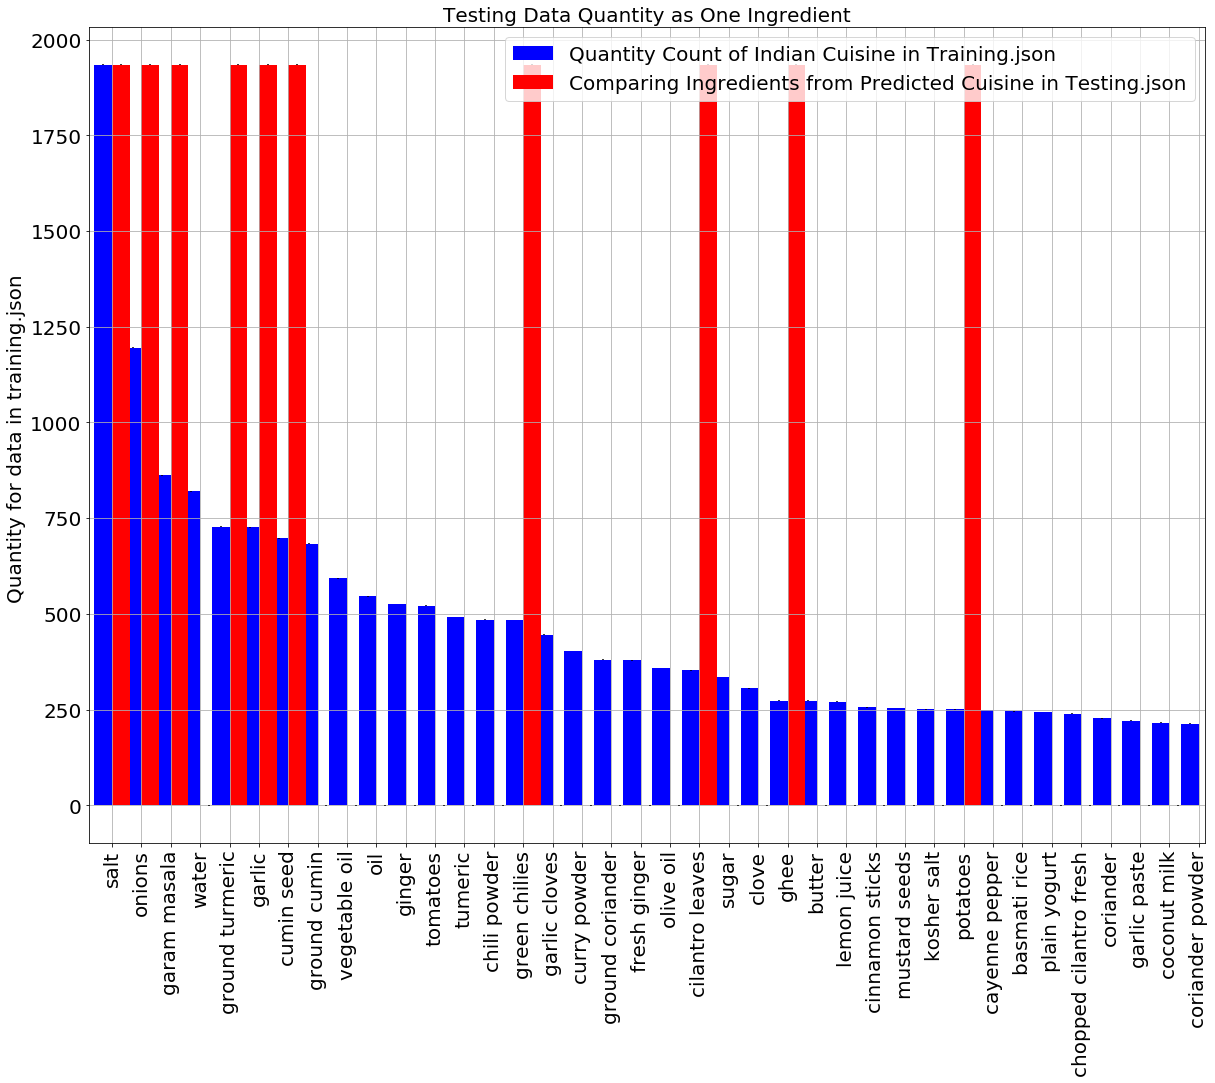

In [24]:
#change the ingredients size shown in graph with N, THE NUMBER OF BARS SHOWN IN GRAPH
N = 38

#CHANGE THE SIZE OF GRAPH WITH fig_size[0] AND fig_size[1]
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 20
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

train_json_ingredients = tuple(counts[:N ])        
show_bars = tuple([1] * N )

ind = np.arange(N)   
width = 0.6      # the width of the bars


ax = grouped_sort_max_first.head(N ).plot.bar(grid=True)
rects1 =ax.bar(ind, train_json_ingredients, width, color='b', yerr=show_bars)

test_json_ingredients = tuple(boolean_ingred_list[:N ])
show_bars = tuple([1] * N )
rects2 = ax.bar(ind + width, test_json_ingredients, width, color='R', yerr=show_bars)

# add some text for labels, title and axes ticks
ax.set_ylabel('Quantity for data in training.json ')
ax.set_title('Testing Data Quantity as One Ingredient')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(features)

                                    #Change the name of cuisine here that's being predicted
ax.legend((rects1[0], rects2[0]), ('Quantity Count of Indian Cuisine in Training.json', 'Comparing Ingredients from Predicted Cuisine in Testing.json'))


font_size = 20

plt.rc('font', size=font_size)          # controls default text sizes
plt.rc('axes', titlesize=font_size)     # fontsize of the axes title
plt.rc('axes', labelsize=font_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_size)    # legend fontsize
plt.rc('figure', titlesize=font_size)  # fontsize of the figure title

plt.show()